In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
dataframes = [pd.read_csv(filename) for filename in uploaded.keys()]

merged_df = pd.concat(dataframes, ignore_index=True)
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)
merged_df.drop(columns=['image_name'], inplace=True)
merged_df.to_csv('merged_with_class.csv', index=False)
#files.download('merged_with_class.csv')

X = merged_df.iloc[:, :-1]
y = merged_df.iloc[:, -1]
num_classes= y.nunique()
print(f" shape of x is: {X.shape}   shape of y is : {y.shape}  and no of class {num_classes}")
total_samples = len(X)                                ##split data 80%-20%
split_ratio = 0.8  # 80% for training
split_index = int(total_samples * split_ratio)
X_train = X[:split_index] ; X_test = X[split_index:]
y_train = y[:split_index] ; y_test = y[split_index:]
xt =  X_train
no_row=len(xt)
column=xt.shape[1]
#print("column",column)
yt=y_train.T
print(f"xtrain shape {xt.shape} and  ytrain shape {y_train.shape} \n xtest shape {X_test.shape} and  ytrain shape {y_test.shape}")


Saving Benign_feature.csv to Benign_feature.csv
Saving Malignant_feature.csv to Malignant_feature.csv
Saving Normal_feature.csv to Normal_feature.csv
 shape of x is: (1097, 100)   shape of y is : (1097,)  and no of class 3
xtrain shape (877, 100) and  ytrain shape (877,) 
 xtest shape (220, 100) and  ytrain shape (220,)


 --- Exam   0 
class topper is   0.44583808437856326
 --- Exam   1 
class topper is   0.5290763968072976
 --- Exam   2 
class topper is   0.5438996579247435
 --- Exam   3 
class topper is   0.5701254275940707
 --- Exam   4 
class topper is   0.5917901938426454
 --- Exam   5 
class topper is   0.5906499429874572
.............. updated with previous class topper  0.5917901938426454
 --- Exam   6 
class topper is   0.5940706955530216
 --- Exam   7 
class topper is   0.5940706955530216
 --- Exam   8 
class topper is   0.6043329532497149
 --- Exam   9 
class topper is   0.6077537058152793
Training Precision: 0.5451803874493483
Training Recall: 0.5598631698973774


,Iteration_Value
0,0.445838
1,0.529076
2,0.543900
3,0.570125
4,0.591790
5,0.591790
6,0.594071
7,0.594071
8,0.604333
9,0.607754


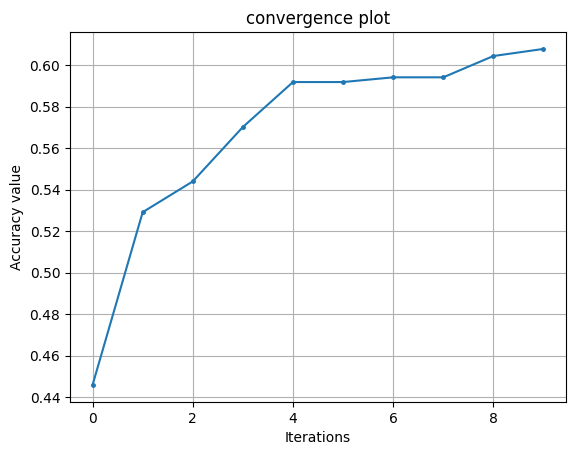

In [ ]:
import numpy as np, random, os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras.activations import softmax
from tensorflow.keras.losses import categorical_crossentropy
from scipy.special import expit
RED = '\033[91m'; GREEN = '\033[92m'; YELLOW = '\033[93m'; BLUE = '\033[94m'; MAGENTA = '\033[95m'; RESET = '\033[0m'
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score


def gru(xt,h_t,w,number):
  column=xt.shape[1]
  length=xt.shape[0]
  #print(f"length is {length}")
  wz = w[0:number,:];   wr = w[number:2*number,:]  ;  wc = w[2*number:3*number,:]

  wzx = wz[:,0:column]  ;  wrx = wr[:,0:column]  ;  wcx = wc[:,0:column]
  wzu = wz[:,column:]  ;  wru = wr[:,column:]  ;  wcu = wc[:,column:]

  bz = np.ones((number,length));  br = np.zeros((number,length)) ;  bc = np.zeros((number,length))

  #print(f'wzx {wzx.shape} shape of xt {xt.shape} wzu {wzu.shape}  ht shape{ h_t.shape} shape of bz{bz.shape} ')
  zt=expit(np.matmul(wzx, xt.T)+(wzu @ h_t)+bz)
  rt=expit(np.matmul(wrx, xt.T)+(wru @ h_t)+br)
  ct_l= np.tanh(np.matmul(wcx, xt.T))    #+(wcu @ (rt * h_t)) + bc)
  Ht= zt * ct_l + ((1-zt) * h_t)
  return Ht


def acc(y_pred,y_train):
  #print(f" print y_pred {y_pred.shape} y_hot  {y_train.shape}")
  y_pred_labels = np.argmax(y_pred, axis=1)
  y_true_labels = np.argmax(y_train, axis=1)
  return accuracy_score(y_true_labels, y_pred_labels)



exam=10
sec, student= 10, 150                                    #  change here
course_row=9
course_col=(column+3)
max_val, min_val, = 1, 0
IWFmax,IWFmin = 0.5, 0
c1=1.2
c2=1.8
convergence=[]
ht = np.random.uniform(low=0.1, high=0.5, size=(exam,num_classes,no_row))
sec_top=np.zeros((exam,sec))
sec_topper_index=np.zeros((exam,sec, course_row,course_col))
matrix = np.empty((exam,sec, student, course_row,course_col))
I = np.full((exam,sec, student, course_row,course_col),0.001)
result = np.zeros((exam,sec, student))
class_top = np.zeros((exam))
class_topper_course= np.zeros((exam,course_row,course_col))
for e in range(exam):
    print(f" {BLUE}--- Exam   {e} {RESET}")
    IWF = IWFmax - ((IWFmax - IWFmin) * e / exam)
    for i in range(sec):
        #print("\nSection", i)
        for j in range(student):
          for k in range(course_row):
            for l in range(course_col):
              if e==0:
                matrix[e, i, j, k, l] = (max_val - min_val) * np.random.rand() + min_val
              else:
                if np.array_equal(sec_topper_index[e-1, i], matrix[e-1, i, j]):
                   I[e, i, j, k,l] =  IWF * I[e-1, i, j, k,l] + c1 * np.random.rand() * (class_topper_course[e-1, k,l]  - sec_topper_index[e-1, i, k,l])
                   matrix[e,i,j,k] = matrix[e-1,i,j,k] + I[e, i, j, k]
                else:
                    I[e, i, j, k,l] = IWF * I[e-1, i, j, k,l] + c2 * np.random.rand() * (sec_topper_index[e-1, i, k,l] - matrix[e-1, i, j, k,l])
                    matrix[e,i,j,k,l] = matrix[e-1,i,j,k,l] + I[e, i, j, k,l]
          #matrix[e,i,j]  = np.clip(matrix[e,i,j],min_val,max_val)
          #print("Student's  course values:", matrix[e,i,j])
          ht[e] = gru(X_train, ht[e-1], matrix[e,i,j],num_classes)
          #print("output of the cell state is ",ht[e].shape)
          y_train_one_hot = to_categorical(y_train, num_classes)
          #print(f" the y value is{y_train_one_hot}")
          ht[e]=softmax(ht[e])
          #print("output of the cell state is ",ht[e].shape)
          #binary_output = (h_t[E] > threshold).astype(int)
          #loss = categorical_crossentropy(y_train_one_hot, val)
          result[e,i, j] =  acc(ht[e].T,y_train_one_hot)             #mean_squared_error(yt,ht[e])  #process_matrix(matrix[e,i,j])
          #print(f"Student values: {result[e ,i ,j]}")
        sec_top[e,i]=np.max(result[e,i])
        #print(" section topper is",sec_top[e,i])
        sec_pos=np.argmax(result[e,i])
        #print(" section topper's position is",sec_pos)
        sec_topper_index[e,i]=matrix[e,i,sec_pos]
        #print(" section topper's course value is",sec_topper_index[e,i])
        MODEL=matrix[e,i,j]

    class_top[e]= np.max(sec_top[e])
    print("class topper is  ",class_top[e])
    class_top_pos = np.argmax (sec_top[e])
    #print(f"Class topper is from section: {class_top_pos}")
    class_topper_course[e] = sec_topper_index[e,class_top_pos]
    #print(f"Class topper's course values are: {class_topper_course[e]}")
    if e>0 and class_top[e]<class_top[e-1]:
      class_top[e]=class_top[e-1]
      class_topper_course[e]=class_topper_course[e-1]
      sec_top[e]=sec_top[e-1]
      sec_topper_index[e]=sec_topper_index[e-1]
      matrix[e]=matrix[e-1]
      print(f"{BLUE}.............. updated with previous class topper  {class_top[e]}{RESET}")
    convergence.append(class_top[e])

y_pred_train = np.argmax(ht[-1].T, axis=1)  # Get predicted labels for training data
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')

print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
#print('convergence',convergence)
output_df = pd.DataFrame({"Iteration_Value": convergence})
display(output_df)
output_df.to_csv("convergence_values.csv", index=False)

MODEL=class_topper_course[-1]
plt.plot(convergence,marker='.',ms=5)
plt.xlabel("Iterations")
plt.ylabel("Accuracy value")
plt.title("convergence plot")
plt.grid(True)
plt.savefig('convergence_curve.png')
plt.show()

val test shpae is (220, 3)
y_test_one_hot shape is  (220, 3)
Test result is 0.4409090909090909
Test Precision: 0.5016543120639761
Test Recall: 0.4409090909090909


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

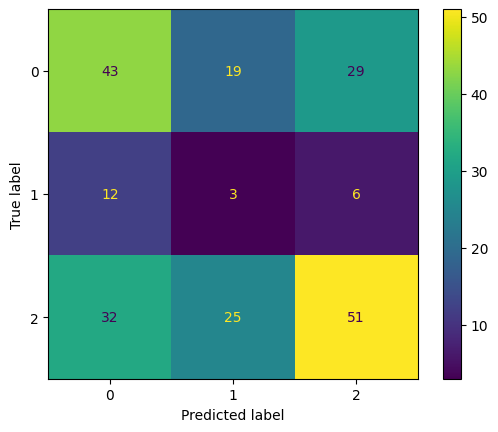

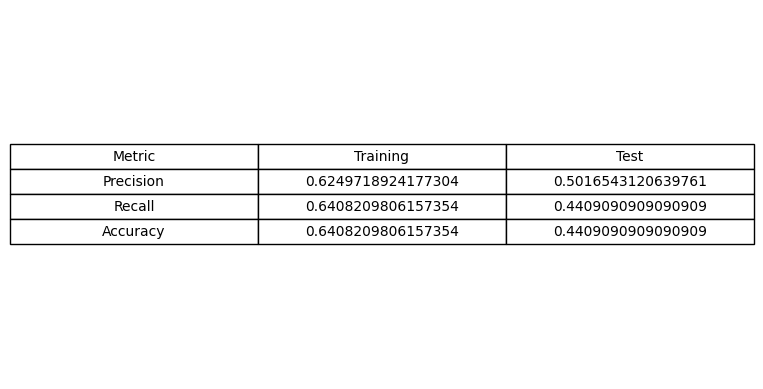

In [ ]:
######## Testing part

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt


def gru(xt,h_t,w,number):
  column=xt.shape[1]
  length=xt.shape[0]
  #print(f"length is {length}")
  wz = w[0:number,:];   wr = w[number:2*number,:]  ;  wc = w[2*number:3*number,:]

  wzx = wz[:,0:column]  ;  wrx = wr[:,0:column]  ;  wcx = wc[:,0:column]
  wzu = wz[:,column:]  ;  wru = wr[:,column:]  ;  wcu = wc[:,column:]

  bz = np.ones((number,length));  br = np.zeros((number,length)) ;  bc = np.zeros((number,length))

  #print(f'wzx {wzx.shape} shape of xt {xt.shape} wzu {wzu.shape}  ht shape{ h_t.shape} shape of bz{bz.shape} ')
  zt=expit(np.matmul(wzx, xt.T)+(wzu @ h_t)+bz)
  rt=expit(np.matmul(wrx, xt.T)+(wru @ h_t)+br)
  ct_l= np.tanh(np.matmul(wcx, xt.T))    #+(wcu @ (rt * h_t)) + bc)
  Ht= zt * ct_l + ((1-zt) * h_t)
  return Ht



h_a=ht[-1]
#print(h_a.shape)
y_test_one_hot = to_categorical(y_test, num_classes)
row1=X_test.shape[0]
#print(row1)
ht1=h_a[:,:row1]
#print(ht1.shape)
#print(ct1.shape)
val_test=gru(X_test, ht1, MODEL,num_classes)
val_test=np.array(val_test.T)
val_test=softmax(val_test)
print("val test shpae is",val_test.shape)
print("y_test_one_hot shape is ",y_test_one_hot.shape)
#loss_test=mean_squared_error(y_test_one_hot,val_test
loss_test=acc(val_test,y_test_one_hot)
print(f"{RED}Test result is {loss_test}")

y_pred_test = np.argmax(val_test, axis=1)  # Get predicted labels for testing data
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")


accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

#print(f"Training Accuracy: {accuracy_train}")
#print(f"Test Accuracy: {accuracy_test}")
#generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualize and save the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.savefig('confusion_matrix.png')

#create a table of matrix
fig, ax = plt.subplots()
ax.axis('off')

table_data = [
    ['Metric', 'Training', 'Test'],
    ['Precision', precision_train, precision_test],
    ['Recall', recall_train, recall_test],
    ['Accuracy', accuracy_train, accuracy_test]
]

table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

plt.savefig('metrics_table.png')






file_path = "/content/output_text_file.txt"
with open(file_path, 'w') as file:
    file.write(f'Model: {MODEL}\n\n')
    file.write(f' exam {exam} sec {sec} student {student} course {course_row} X {course_col} \n')
    file.write(f' c1 {c1} c2 {c2} low { min} high {max} \n')
    file.write(f'Training error {convergence[-1]}   and Test error {loss_test} \n')

files.download('convergence_values.csv')
files.download('metrics_table.png')
files.download(file_path)
files.download('confusion_matrix.png')
files.download('convergence_curve.png')